## Principes clés pour le déploiement de votre système de ML

Dans ce chapitre, vous apprendrez les principes fondamentaux du déploiement de modèles d'apprentissage automatique (ML) en production et de mettre en œuvre le déploiement pratique de modèles de ML pour le problème métier sur lequel nous avons travaillé. Pour obtenir une compréhension globale et une expérience de première main, nous déploierons des modèles de ML qui ont été formés et empaquetés précédemment (au chapitre 4, Pipelines d'apprentissage automatique et au chapitre 5, Évaluation et empaquetage de modèles) à l'aide du service Azure ML sur deux différentes cibles de déploiement : une instance de conteneur Azure et un cluster Kubernetes. 

Nous apprendrons également à déployer des modèles de ML à l'aide d'un framework open source appelé MLflow avec lequel nous avons déjà travaillé. Cela vous permettra de comprendre le déploiement de modèles de ML en tant que points de terminaison d'API REST sur diverses cibles de déploiement à l'aide de deux outils différents (le service Azure ML et MLflow). Cela vous fournira les compétences nécessaires pour déployer des modèles de ML pour n'importe quel scénario donné sur le cloud

Dans ce chapitre, nous commençons par examiner en quoi le ML est différent dans la recherche et la production et continuons à explorer les sujets suivants :

* ML dans la recherche par rapport à la production
* Comprendre les types d'inférence ML dans la production
* Parcourir l'infrastructure de cartographie pour votre solution 
* Déploiement pratique (pour le problème métier)
* Compréhension du besoin d'intégration continue et de déploiement continu

## Le ML dans la recherche par rapport à la production 

Le ML dans la recherche est mis en œuvre avec des objectifs et des priorités spécifiques pour améliorer l'état de l'art dans le domaine, tandis que le but du ML en production est d'optimiser, d'automatiser ou d'augmenter un scénario ou une entreprise. Afin de comprendre le déploiement des modèles de ML, commençons par comparer la manière dont le ML est mis en œuvre dans la recherche par rapport à la production (dans l'industrie). 

De multiples facteurs, tels que les performances, la priorité, les données, l'équité et l'interprétabilité, répertoriés dans le tableau 6.1, décrivent comment les déploiements et le ML fonctionnent différemment dans la recherche et la production :

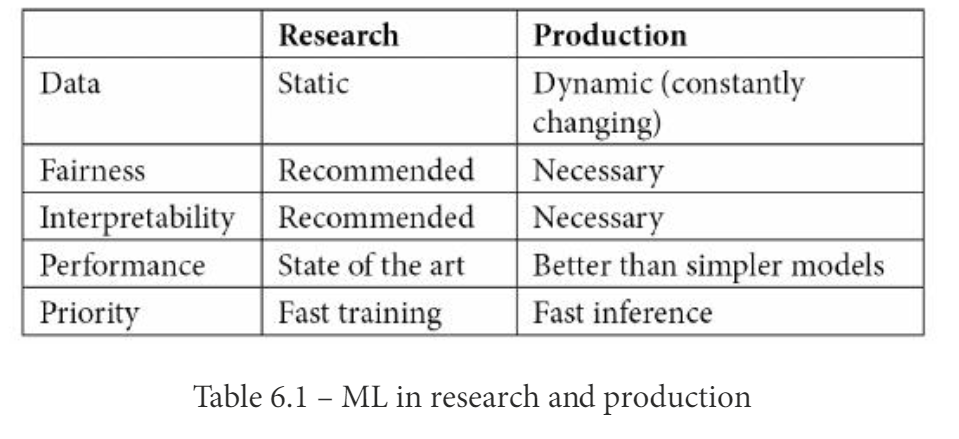

## Data

En général, les données des projets de recherche sont statiques, car les data scientists ou les statisticiens travaillent sur un ensemble de données défini et tentent de battre les modèles de pointe actuels. Par exemple, récemment, de nombreuses percées dans les modèles de traitement du langage naturel ont été observées, par exemple avec BERT de Google ou XLNet de Baidu. Pour entraîner ces modèles, les données ont été grattées et compilées dans un ensemble de données statique. Dans le monde de la recherche, pour évaluer ou comparer les performances des modèles, des ensembles de données statiques sont utilisés pour évaluer les performances, comme le montre le tableau 6.2 (source : https://arxiv.org/abs/1906.08237) :
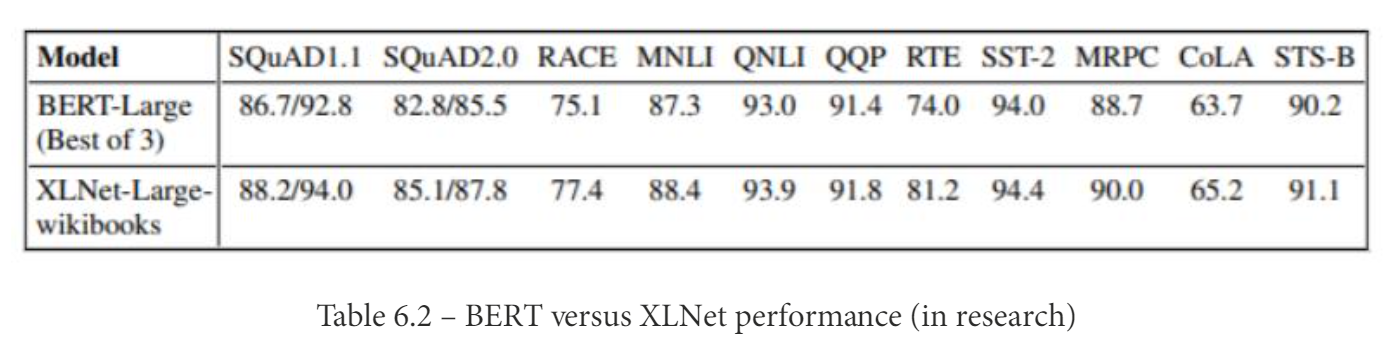

Par exemple, nous pouvons comparer les performances de deux modèles en comparant leurs performances sur un ensemble de données populaire appelé SQUAD (10 000+ QnA) version 1.1, sur lequel BERT fonctionne avec une précision de 92,8% et XLNET avec une précision de 94,0%. De même, les données utilisées dans la recherche pour la formation et l'évaluation des modèles sont statiques, tandis que les données en production ou dans les cas d'utilisation industrielle sont dynamiques et changent constamment en fonction de l'environnement, des opérations, de l'entreprise ou des utilisateurs.

## Équité

Dans la vraie vie, les modèles biaisés peuvent être coûteux. Des décisions injustes ou biaisées conduiront à de mauvais choix pour les affaires et les opérations. Pour les modèles ML en production, il est important que les décisions prises soient aussi justes que possible. Cela peut être coûteux pour l'entreprise si les modèles en production ne sont pas équitables. Par exemple, récemment, Amazon a créé un logiciel de sélection des ressources humaines qui sélectionne les candidats en fonction de leur adéquation à l'emploi pour lequel ils ont postulé. Les spécialistes du ML chez Amazon ont découvert que les candidats masculins étaient favorisés par rapport aux candidates (source : https://www.businessinsider.com/amazon-ai-biased-against-women-no-surprise-sandra-wachter-2018-10). Ce type de biais du système peut être coûteux car, dans le cas d'Amazon, vous pouvez manquer des talents incroyables en raison d'un biais. Par conséquent, avoir des modèles équitables en production est essentiel et doit être surveillé en permanence. Dans la recherche, les modèles équitables sont également importants mais pas aussi critiques que dans la production ou la vie réelle, et l'équité n'est pas surveillée de manière critique comme dans la production. L'objectif de la recherche est de surpasser l'état de l'art, et l'équité du modèle est un objectif secondaire


## Interprétabilité 

L'interprétabilité du modèle est essentielle en production afin de comprendre la corrélation ou la causalité entre les décisions du modèle ML et son impact sur les opérations ou l'entreprise pour optimiser, augmenter ou automatiser une entreprise ou une tâche à accomplir. Ce n'est pas le cas dans la recherche, où l'objectif est de défier ou de battre les résultats de pointe, et ici la priorité est de meilleures performances (telles que la précision ou d'autres mesures). Dans le cas de la recherche, l'interprétabilité du modèle ML est bonne mais pas obligatoire. En règle générale, les projets de ML sont plus préoccupés par la prédiction des résultats que par la compréhension de la causalité. Les modèles de ML sont excellents pour trouver des corrélations dans les données, mais pas de causalité. Nous nous efforçons de ne pas tomber dans le gouffre consistant à assimiler l'association à la cause dans nos entreprises. Notre capacité à nous fier au ML est gravement entravée par ce problème. Ce problème limite gravement notre capacité à utiliser le ML pour prendre des décisions. Nous avons besoin de ressources capables de comprendre les relations causales entre les données et de créer des solutions de ML qui peuvent bien se généraliser d'un point de vue commercial. Avoir les bons mécanismes d'interprétabilité des modèles peut améliorer notre compréhension de la causalité et nous permettre de créer des solutions de ML qui se généralisent bien et sont capables de gérer des données inédites. En conséquence, nous pouvons prendre des décisions plus fiables et transparentes en utilisant ML. Dans le cas de la production (dans un cas d'utilisation métier), un manque d'interprétabilité n'est pas du tout recommandé. Regardons un cas hypothétique. Supposons que vous ayez un cancer et que vous deviez choisir un chirurgien pour effectuer votre chirurgie. Deux chirurgiens sont disponibles, l'un est humain (avec un taux de guérison de 80%) et un autre est un modèle de boîte noire d'IA (avec un taux de guérison de 90%) qui ne peut pas être interprété ou expliquer son fonctionnement, mais il a un taux de guérison élevé . Que choisiriez-vous? L'IA ou un chirurgien pour soigner le cancer ? Il serait plus facile de remplacer le chirurgien par l'IA si le modèle n'était pas un modèle boîte noire. Bien que l'IA soit meilleure que le chirurgien, sans comprendre le modèle, la décision, la confiance et la conformité sont un problème. L'interprétabilité des modèles est essentielle pour prendre des décisions juridiques. Par conséquent, il est essentiel d'avoir une interprétabilité du modèle pour le ML en production. Nous en apprendrons davantage à ce sujet dans les chapitres suivants.

## Performance

En ce qui concerne les performances des modèles ML, l'objectif de la recherche est d'améliorer les modèles de pointe, tandis qu'en production, l'objectif est de créer de meilleurs modèles que des modèles plus simples qui répondent aux besoins de l'entreprise (état- les modèles à la pointe de la technologie ne sont pas au centre de l'attention)

## Priorité 

En recherche, former les modèles plus rapidement et mieux est la priorité, tandis qu'en production, une inférence plus rapide est la priorité car l'objectif est de prendre des décisions et de répondre aux besoins de l'entreprise en temps réel.

## Comprendre les types d'inférence ML 

En productionDans la section précédente, nous avons vu les priorités du ML en recherche et en production. Pour répondre aux besoins de l'entreprise en production, les modèles de ML sont déduits à l'aide de diverses cibles de déploiement, en fonction des besoins. Prédire ou prendre une décision à l'aide d'un modèle ML est appelé inférence de modèle ML. Explorons les moyens de déployer des modèles de ML sur différentes cibles de déploiement pour faciliter l'inférence de ML en fonction des besoins de l'entreprise

## Cibles de déploiement 

Dans cette section, nous examinerons différents types de cibles de déploiement et pourquoi et comment nous servons des modèles de ML pour l'inférence dans ces cibles de déploiement. Commençons par examiner une machine virtuelle ou un serveur sur site


## Machines virtuellesLes 

machines virtuelles peuvent être sur le cloud ou sur site, selon la configuration informatique d'une entreprise ou d'une organisation. Servir des modèles de ML sur des machines virtuelles est assez courant. Les modèles de ML sont servis sur des machines virtuelles sous la forme de services Web. Le service Web exécuté sur une machine virtuelle reçoit une requête utilisateur (sous forme de requête HTTP) contenant les données d'entrée. Le service Web, lors de la réception des données d'entrée, les prétraite dans le format requis pour déduire le modèle ML, qui fait partie du service Web. Une fois que le modèle ML fait la prédiction ou exécute la tâche, la sortie est transformée et présentée dans un format lisible par l'utilisateur. Généralement en JavaScript Object Notation (JSON) ou en chaîne de langage de balisage extensible (XML). 

Habituellement, un service Web est servi sous la forme d'une API REST. Les services Web de l'API REST peuvent être développés à l'aide de plusieurs outils ; par exemple, les outils d'application Web FLASK ou FAST API peuvent être utilisés pour développer des services Web API REST à l'aide de Python ou Spring Boot en Java, ou Plumber en R, selon les besoins. Une combinaison de machines virtuelles est utilisée en parallèle pour faire évoluer et maintenir la robustesse des services Web


Afin d'orchestrer le trafic et de faire évoluer les machines, un équilibreur de charge est utilisé pour répartir les demandes entrantes vers les machines virtuelles pour l'inférence de modèle ML. De cette manière, les modèles de ML sont déployés sur des machines virtuelles sur le cloud ou sur site pour répondre aux besoins de l'entreprise, comme illustré dans le diagramme suivant

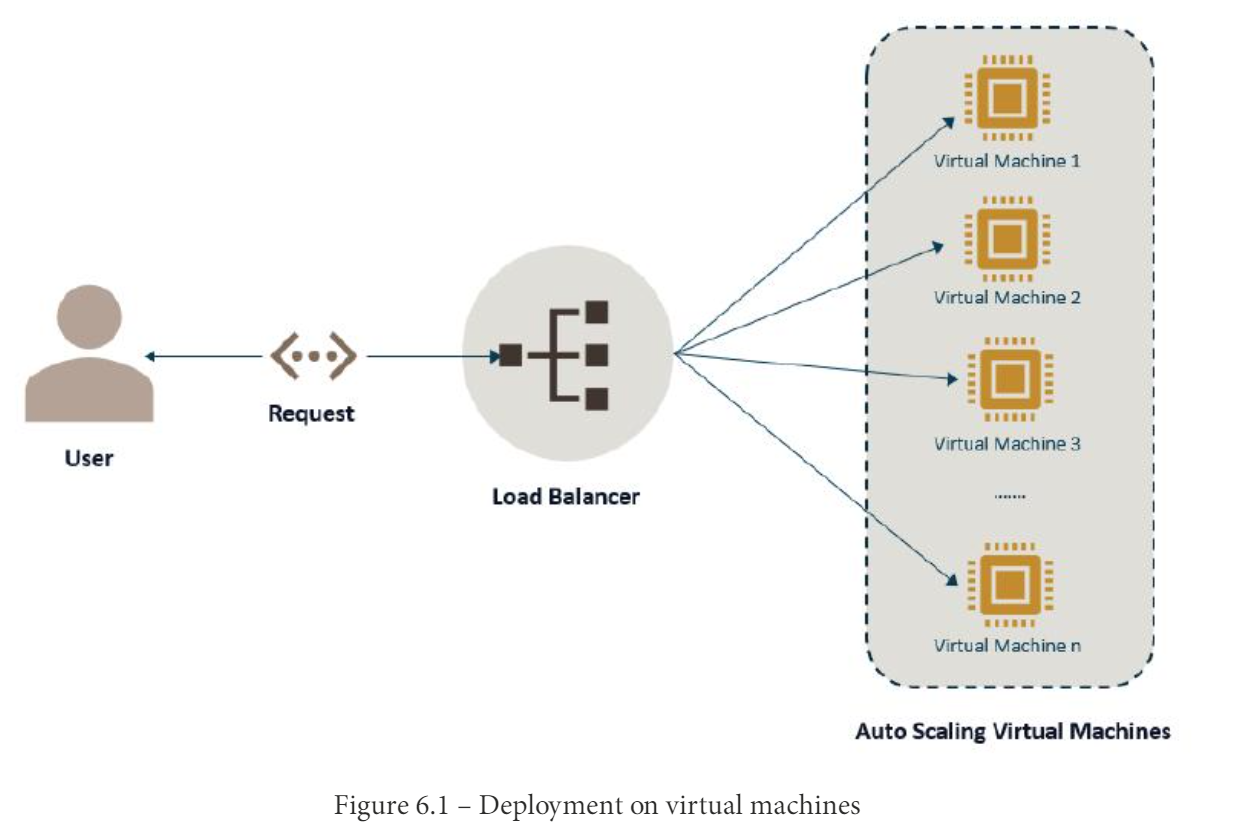

## Containers

Les conteneurs sont un moyen fiable d'exécuter des applications à l'aide du système d'exploitation Linux avec des paramètres personnalisés. Un conteneur est une application exécutée avec un paramètre personnalisé orchestré par le développeur. 

Les conteneurs sont un moyen alternatif et plus économe en ressources de servir des modèles que les machines virtuelles. Ils fonctionnent comme des machines virtuelles car ils ont leur propre environnement d'exécution, qui est isolé et limité à la mémoire, au système de fichiers et aux processus. 

Les conteneurs peuvent être personnalisés par les développeurs pour les confiner aux ressources requises telles que la mémoire, le système de fichiers et les processus, et les machines virtuelles sont limitées à de telles personnalisations. Ils sont plus flexibles et fonctionnent de manière modulaire et offrent donc plus d'efficacité et d'optimisation des ressources. Ils permettent une mise à l'échelle jusqu'à zéro, car les conteneurs peuvent être réduits à zéro réplique et exécuter une sauvegarde sur demande. 

De cette manière, une consommation de puissance de calcul inférieure est possible par rapport à l'exécution de services Web sur des machines virtuelles. En raison de cette faible consommation d'énergie de calcul, des économies sur le cloud sont possibles.


Les conteneurs présentent de nombreux avantages ; Cependant, un inconvénient peut être la complexité requise pour travailler avec des conteneurs, car cela nécessite une expertise. Il existe certaines différences dans la façon dont les conteneurs et les machines virtuelles fonctionnent. Par exemple, il peut y avoir plusieurs conteneurs exécutés dans une machine virtuelle qui partagent le système d'exploitation et les ressources avec la machine virtuelle, mais la machine virtuelle exécute ses propres ressources et système d'exploitation. 

Les conteneurs peuvent fonctionner de manière modulaire, mais les machines virtuelles fonctionnent comme des unités uniques. 

Docker est utilisé pour créer et déployer des conteneurs ; cependant, il existe des alternatives, telles que Mesos et CoreOS rkt. Un conteneur est généralement fourni avec le modèle ML et le service Web pour faciliter l'inférence ML, de la même manière que nous servons le modèle ML enveloppé dans un service Web dans la machine virtuelle. 

Les conteneurs doivent être orchestrés pour être consommés par les utilisateurs. L'orchestration des conteneurs signifie l'automatisation du déploiement, de la gestion, de la mise à l'échelle et de la mise en réseau des conteneurs. Les conteneurs sont orchestrés à l'aide d'un système d'orchestration de conteneurs tel que Kubernetes. Dans le schéma suivant, on peut voir l'orchestration des conteneurs avec auto-scaling (basé sur le trac des requêtes)


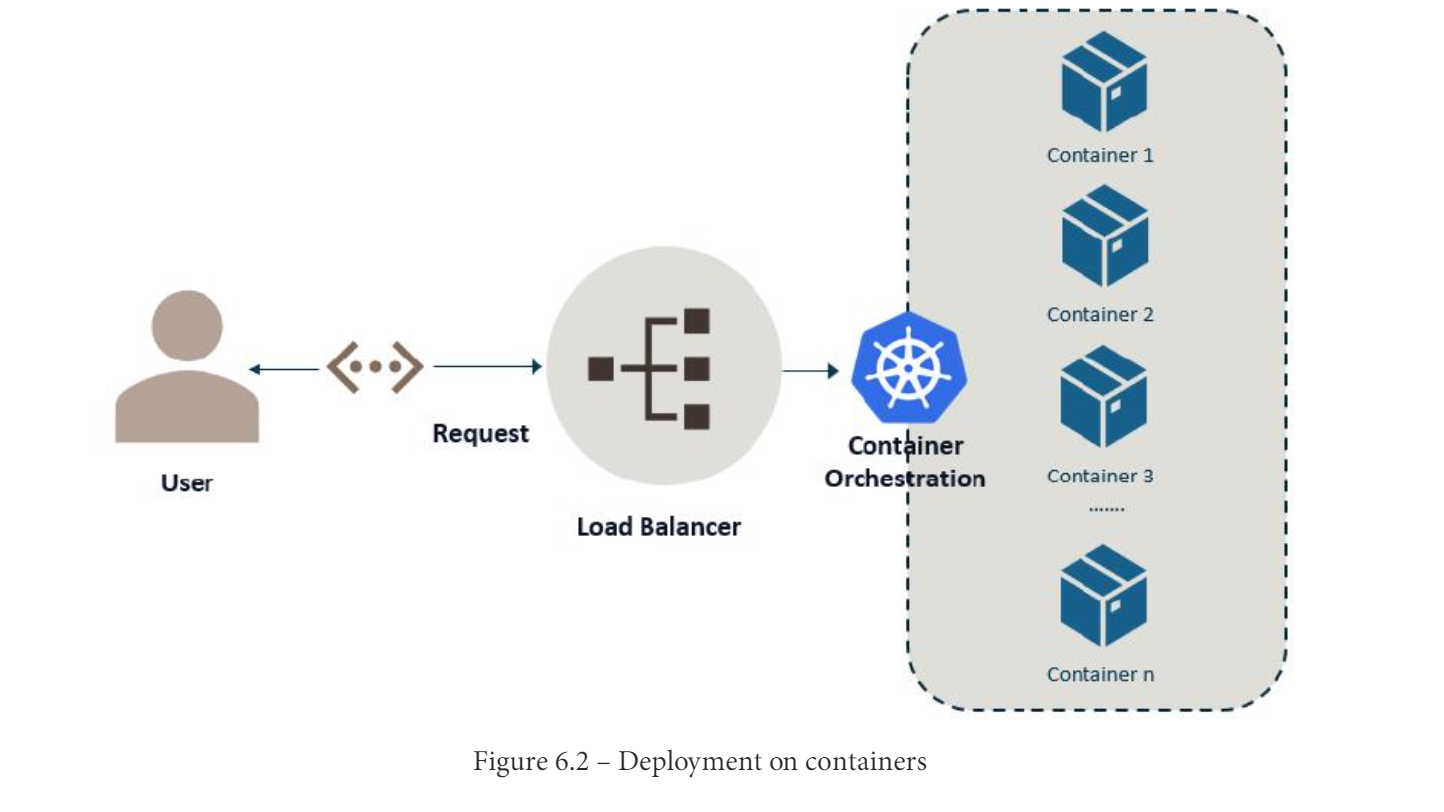

## Serverless

L'informatique sans serveur, comme son nom l'indique, n'implique pas de machine virtuelle ou de conteneur. Il élimine les tâches de gestion de l'infrastructure telles que la gestion du système d'exploitation, la gestion des serveurs, le provisionnement de la capacité et la gestion des disques. L'informatique sans serveur permet aux développeurs et aux organisations de se concentrer sur leur produit principal plutôt que sur des tâches banales telles que la gestion et l'exploitation de serveurs, sur le cloud ou sur site. 


L'informatique sans serveur est facilitée par l'utilisation de services cloud natifs. Par exemple, Microsoft Azure utilise Azure Functions et AWS utilise des fonctions Lambda pour déployer des applications sans serveur. 

Le déploiement d'applications sans serveur implique la soumission d'une collection de fichiers (sous la forme de fichiers .zip) pour exécuter des applications ML. L'archive .zip a généralement un fichier avec une fonction ou une méthode particulière à exécuter. L'archive zip est téléchargée sur la plate-forme cloud à l'aide de services cloud et déployée en tant qu'application sans serveur. L'application déployée sert de point de terminaison d'API pour soumettre des entrées à l'application sans serveur servant le modèle ML. 



Le déploiement de modèles ML à l'aide d'applications sans serveur peut présenter de nombreux avantages : il n'est pas nécessaire d'installer ou de mettre à niveau les dépendances, ni de maintenir ou de mettre à niveau les systèmes. Les applications sans serveur s'adaptent automatiquement à la demande et sont robustes en termes de performances globales. Synchrone (l'exécution se fait l'une après l'autre dans une même série, A->B->C->D) et asynchrone (l'exécution se fait en parallèle ou en priorité, non dans l'ordre : A->C->D- >B ou A et B ensemble en parallèle et C et D en parallèle) sont tous deux pris en charge par des fonctions sans serveur. 

Cependant, il existe certains inconvénients, tels que la disponibilité des ressources cloud telles que la RAM ou l'espace disque ou l'indisponibilité du GPU, qui peuvent être des exigences cruciales pour l'exécution de modèles lourds tels que l'apprentissage en profondeur ou les modèles d'apprentissage par renforcement. Par exemple, nous pouvons atteindre le mur de la limitation des ressources si nous avons déployé un modèle sans utiliser d'opérations sans serveur. Le modèle ou l'application déployée ne s'adaptera pas automatiquement et limitera ainsi la puissance de calcul disponible. Si plus d'utilisateurs déduisent le modèle ou l'application que la limite, nous frapperons le bloqueur d'indisponibilité des ressources. Dans le schéma suivant, nous pouvons voir comment les applications traditionnelles et les applications sans serveur sont développées :


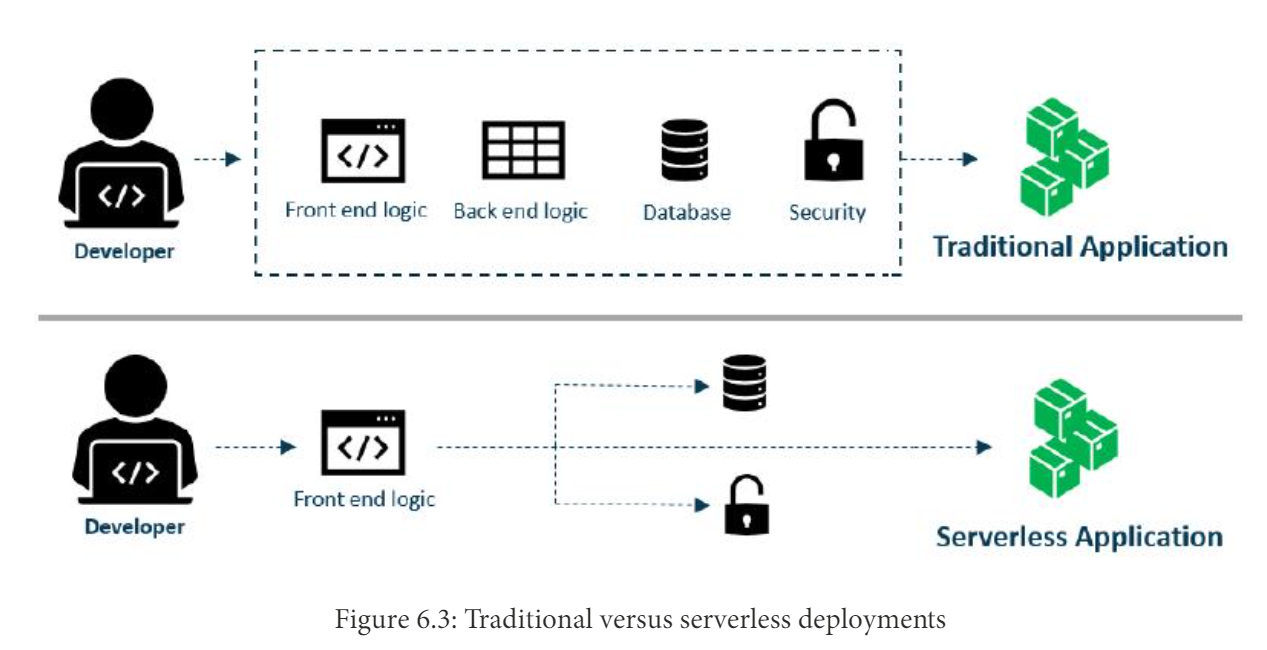

Pour développer des applications sans serveur, le développeur n'a qu'à se concentrer sur la logique de l'application et ne pas se soucier du backend ou du code de sécurité, qui est pris en charge par les services cloud lors du déploiement d'applications sans serveur

## Model streaming

Model streaming est une méthode de diffusion de modèles pour gérer les données de streaming. Il n'y a pas de début ni de fin de flux de données. Chaque seconde, des données sont produites à partir de milliers de sources et doivent être traitées et analysées dans les plus brefs délais. Par exemple, les résultats de la recherche Google doivent être traités en temps réel. 

Le streaming de modèle est une autre façon de déployer des modèles ML. Il présente deux avantages principaux par rapport aux autres techniques de diffusion de modèles, telles que les API REST ou les approches de traitement par lots. Le premier avantage est l'asynchronicité (servant plusieurs requêtes à la fois). Les applications REST API ML sont robustes et évolutives, mais ont la limitation d'être synchrones (elles traitent les demandes du client sur la base du premier arrivé, premier servi), ce qui peut entraîner une latence et une utilisation des ressources élevées. Pour faire face à cette limitation, un traitement de flux est disponible. Il est intrinsèquement asynchrone car l'utilisateur ou le client n'a pas à se coordonner ou à attendre que le système traite la demande


Le traitement de flux est capable de traiter de manière asynchrone et de servir les utilisateurs en déplacement. Pour ce faire, le traitement de flux utilise un courtier de messages pour recevoir des messages des utilisateurs ou des clients. Le courtier (broker) de messages autorise les données au fur et à mesure qu'elles arrivent et étale le traitement dans le temps. Le courtier(broker)  de messages découple les requêtes entrantes et facilite la communication entre les utilisateurs ou clients et le service sans être au courant des opérations de chacun, comme illustré à la gure 5.4. Il existe quelques options pour les courtiers de streaming de messages, tels que Apace Storm, Apache Kafka, Apache Spark, Apache Flint, Amazon Kinesis et StreamSQL. L'outil que vous choisissez dépend de la configuration et de l'architecture informatiques.

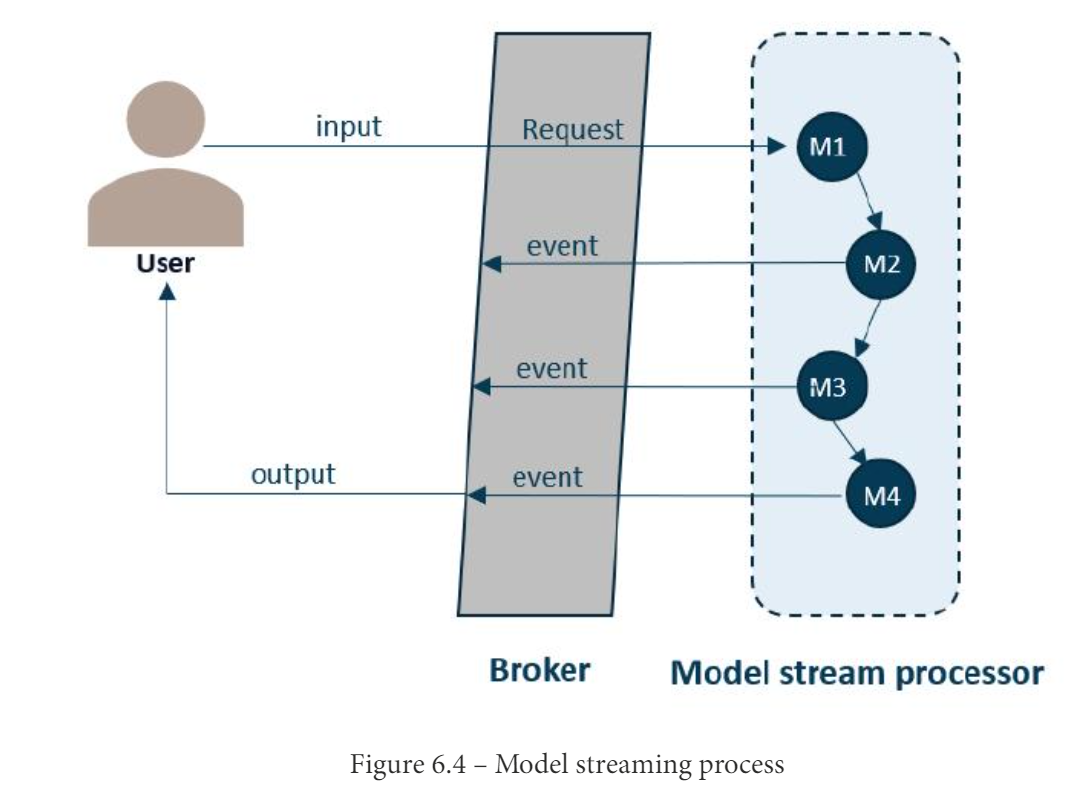

Le deuxième avantage du traitement de flux est lorsque plusieurs modèles sont inférés dans un système ML. Les API REST sont idéales pour le traitement à un ou deux modèles, mais elles parviennent à produire de la latence et à utiliser de grandes quantités de calcul de ressources lorsque plusieurs modèles doivent être inférés, et en plus de cela, elles sont limitées à l'inférence synchrone.
 
 Dans le cas de plusieurs modèles, le traitement de flux est une bonne option car tous les modèles et artefacts (code et fichiers) nécessaires pour exécuter le système ML peuvent être regroupés et déployés sur un moteur de traitement de flux (il s'exécute sur son propre cluster de machines et gère allocation de ressources pour la distribution du traitement des données)


Par exemple, examinons le cas d'utilisation d'un assistant de messagerie intelligent chargé d'automatiser le service client, comme illustré à la figure 5.4. Afin d'automatiser les réponses pour servir ses utilisateurs, le système d'assistant de messagerie effectue plusieurs prédictions à l'aide de plusieurs modèles :

* Prédire la classe de l'e-mail, comme le spam ou les comptes ou le renouvellement

* Reconnaissance d'intention

* Prédiction de sentiment

* Génération de réponse/texte

ces quatre modèles déployés sur les points de terminaison de l'API REST généreront des coûts de latence et de maintenance élevés, tandis qu'un service de streaming est une bonne alternative car il peut emballer et servir plusieurs modèles en un seul processus et servir en continu les demandes des utilisateurs sous la forme d'un flux. Par conséquent, dans de tels cas, la diffusion en continu est recommandée sur les points de terminaison de l'API REST.

## Cartographier l'infrastructure de notre solution

Dans cette section, nous cartographions les besoins en infrastructure et les cibles de déploiement nécessaires pour répondre aux divers besoins de l'entreprise, comme le montre le tableau 6.3 :


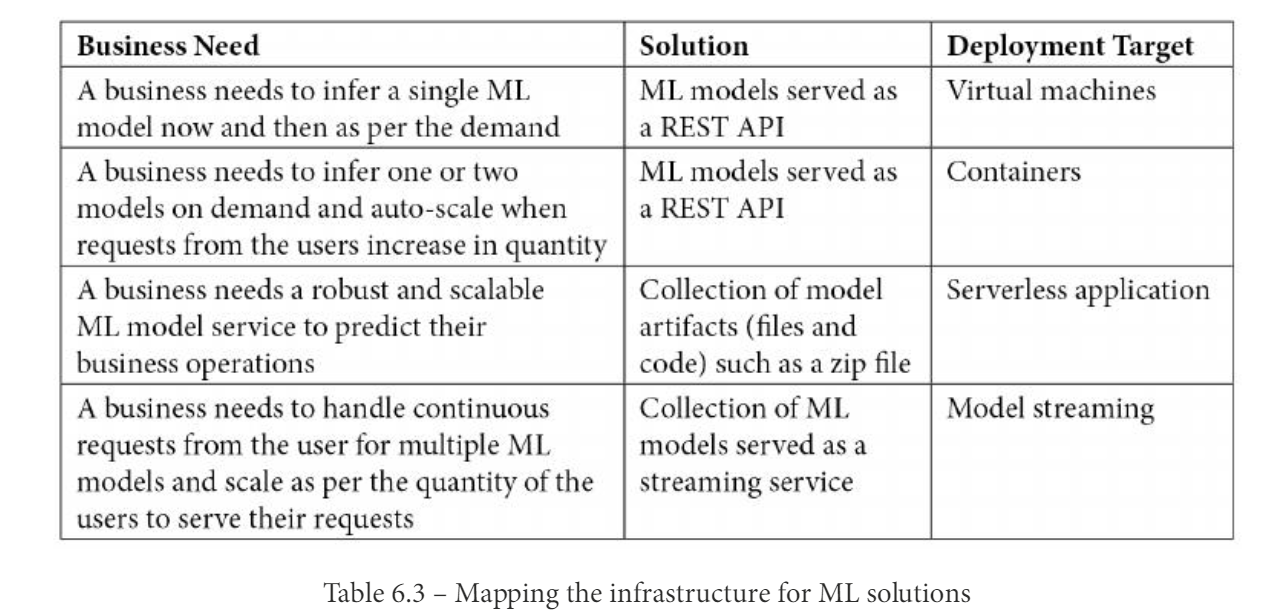

Selon votre cas d'utilisation, il est recommandé de sélectionner une infrastructure et des cibles de déploiement adaptées pour servir les modèles de ML afin de générer un impact commercial ou opérationnel

## Déploiement pratique (pour le problème métier) 

Dans cette section, nous allons apprendre à déployer des solutions pour le problème métier sur lequel nous avons travaillé. Jusqu'à présent, nous avons effectué le traitement des données, la formation des modèles ML, les modèles sérialisés et les avons enregistrés dans l'espace de travail Azure ML. 

Dans cette section, nous allons explorer comment l'inférence est effectuée sur le modèle sérialisé sur un conteneur et un cluster à mise à l'échelle automatique. Ces déploiements vous donneront une large compréhension et vous prépareront bien pour vos futures missions. 

Nous utiliserons Python comme langage de programmation principal, et Docker et Kubernetes pour créer et déployer des conteneurs. Nous allons commencer par déployer un service d'API REST sur une instance de conteneur Azure à l'aide d'Azure ML. Ensuite, nous déploierons un service d'API REST sur un cluster à mise à l'échelle automatique à l'aide de Kubernetes (pour l'orchestration de conteneurs) à l'aide d'Azure ML, et enfin, nous déploierons sur une instance de conteneur Azure à l'aide de MLFLow et d'un framework ML open source ; De cette façon, nous apprendrons à utiliser plusieurs outils et à déployer des modèles de ML sur le cloud (Azure). Commençons par le déploiement sur Azure Container Instances (ACI)5Azure Container Instances°.

## Déploiement du modèle sur ACI

Pour commencer le déploiement, accédez au référentiel GitHub cloné sur Azure DevOps précédemment (au chapitre 3, Code Meets Data), accédez au dossier nommé 06_ModelDeployment et suivez les étapes de mise en œuvre dans le bloc-notes 01_Deploy_model_ACI.ipynb:

1. Nous commençons par importer les packages requis et vérifions la version du SDK Azure ML, comme indiqué dans le code suivant :

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import azureml.corefrom azureml.core import Workspace
from azureml.core.model import Model

# display the core SDK version number

print("Azure ML SDK Version: ", azureml.core.VERSION)

Le code précédent imprimera la version Azure ML SDK (par exemple, 1.10.0 ; votre version peut être différente)


2. Ensuite, à l'aide de la fonction d'espace de travail du SDK Azure ML, nous nous connectons à l'espace de travail ML et téléchargeons les fichiers sérialisés requis et le modèle formé précédemment à l'aide de la fonction Modèle de l'espace de travail. Le scaler et le modèle sérialisés sont utilisés pour effectuer des inférences ou des prédictions. Scaler sera utilisé pour réduire les données d'entrée à la même échelle de données que celle utilisée pour l'apprentissage du modèle, et le fichier de modèle est utilisé pour faire des prédictions sur les données entrantes :

In [ ]:
ws = Workspace.from_config()
print(ws.name, ws.resource_group, ws.location, sep = '\n')

scaler = Model(ws,'scaler').download(exist_ok=True)

model = Model(ws,'support-vector-classifier').download(exist_ok=True)

3. Après le téléchargement du scaler et des chiers de modèle, l'étape suivante consiste à préparer le fichier de scoring. Le fichier de scoring est utilisé pour déduire les modèles ML dans les conteneurs déployés avec le service ML dans l'instance de conteneur Azure et le cluster Kubernetes. Le script de scoring prend les entrées transmises par l'utilisateur et en déduit le modèle ML pour la prédiction, puis fournit la sortie avec la prédiction à l'utilisateur. Il contient deux fonctions principales, init() et run(). Nous commençons par importer les bibliothèques requises puis définissons les fonctions init() et run() :

In [ ]:
%%writefile score.py
import json
import numpy as np
import os
import pickle
import joblib
import onnxruntime
import time
from azureml.core.model import Model
from azureml.monitoring import ModelDataCollector
from inference_schema.schema_decorators import input_schema, output_schema
from inference_schema.parameter_types.numpy_parameter_type import NumpyParameterType

def init():
    global model, scaler, input_name, label_name, inputs_dc, prediction_dc
    

    scaler_path = os.path.join(os.getenv('AZUREML_MODEL_DIR'), 'model-scaler/1/model-scaler.pkl')
    # deserialize the model file back into a sklearn model
    scaler = joblib.load(scaler_path)
    
    model_onnx = os.path.join(os.getenv('AZUREML_MODEL_DIR'), 'support-vector-classifier/2/svc.onnx')
    # print(os.listdir(model_onnx))
    model = onnxruntime.InferenceSession(model_onnx, None)
    input_name = model.get_inputs()[0].name
    label_name = model.get_outputs()[0].name
    
    # variables to monitor model input and output data
    inputs_dc = ModelDataCollector("Support vector classifier model", designation="inputs", feature_names=["feat1", "feat2", "feat3", "feat4", "feat5", "feat6", "feat7"])
    prediction_dc = ModelDataCollector("Support vector classifier model", designation="predictions", feature_names=["weatherprediction"])

    
@input_schema('data', NumpyParameterType(np.array([[34.927778, 0.24, 7.3899, 83, 16.1000, 1016.51, 1]])))
@output_schema(NumpyParameterType(np.array([0])))
def run(data):
                try: 
                    data = scaler.fit_transform(data.reshape(1, 7))
                    inputs_dc.collect(data)
                    
                    # model inference
                    result = model.run([label_name], {input_name: data.astype(np.float32)})[0]
                    # this call is saving model output data into Azure Blob
                    prediction_dc.collect(result)

                 
                except Exception as e:   
                    result = 'error'
                    prediction_dc.collect(result)
                    
                return result.tolist()            

%%writefile score.py écrit ce code dans un fichier nommé score.py, qui est ensuite compressé dans le cadre du service ML dans le conteneur pour effectuer l'inférence de modèle ML.


4. Nous définissons la fonction init() ; il télécharge les modèles requis et les désérialise en variables à utiliser pour les prédictions

En utilisant onnxruntime, nous pouvons désérialiser le modèle de classificateur de vecteur de support. La fonction InferenceSession() est utilisée pour désérialiser et servir le modèle pour l'inférence, et les variables input_name et label_name sont chargées à partir du modèle désérialisé

5. En un mot, la fonction init() charge les fichiers (modèle et scaler) et désérialise et sert les fichiers de modèle et d'artefact nécessaires pour faire des prédictions, qui sont utilisés par la fonction run()

La fonction run () prend les données entrantes brutes comme argument, effectue une inférence de modèle ML et renvoie le résultat prévu comme sortie. Lorsqu'elle est appelée, la fonction run() reçoit les données entrantes, qui sont filtrées et chargées dans une variable pour la mise à l'échelle. Les données entrantes sont mises à l'échelle à l'aide du scaler chargé précédemment dans la fonction init(). Ensuite, l'étape d'inférence du modèle, qui est l'étape clé, est effectuée en inférant des données mises à l'échelle au modèle, comme indiqué précédemment. La prédiction déduite du modèle est ensuite renvoyée en sortie. De cette façon, le fichier de scoring est écrit dans score.py pour être utilisé pour le déploiement.


6. Ensuite, nous allons passer à la partie cruciale du déploiement du service sur une instance de conteneur Azure. Pour cela, nous définissons un environnement de déploiement en créant un fichier d'environnement YAML (Yet Another Markup Language) appelé myenv.yml, comme illustré dans le code suivant. À l'aide de la fonction CondaDependencies(), nous mentionnons tous les packages pip qui doivent être installés dans le conteneur Docker qui sera déployé en tant que service ML. Des packages tels que numpy, onnxruntime, joblib, azureml-core, azureml-defaults et scikit-learn sont installés à l'intérieur du conteneur lors du déclenchement du fichier d'environnement :

In [ ]:
from azureml.core.conda_dependencies import CondaDependencies 

myenv = CondaDependencies.create(pip_packages=["numpy", "onnxruntime", "joblib", "azureml-core", "azureml-defaults", "scikit-learn==0.20.3"])

with open("myenv.yml","w") as f:
  f.write(myenv.serialize_to_string())

7. Ensuite, nous définissons la configuration d'inférence en utilisant la fonction InferenceConfig(), qui prend score.py et le fichier d'environnement comme arguments lors de l'appel. Ensuite, nous appelons la fonction AciWebservice() pour lancer la configuration de calcul (cpu_cores et memory) dans la variable aciconfig comme suit :

In [ ]:
rom azureml.core.model import InferenceConfig
from azureml.core.environment import Environment

myenv = Environment.from_conda_specification(name="myenv", file_path="myenv.yml")
inference_config = InferenceConfig(entry_script="score.py", environment=myenv)

from azureml.core.webservice import AciWebservice

deployment_config = AciWebservice.deploy_configuration(cpu_cores = 1, memory_gb = 1, collect_model_data=True)

8. Nous sommes maintenant prêts à déployer le ML ou le service Web sur l'ACI. Nous utiliserons score.py, le fichier d'environnement (myenv.yml), inference_config et aci_config pour déployer le ML ou le service Web. Nous devrons pointer vers les modèles ou les artefacts à déployer. Pour cela, nous utilisons la fonction Model() pour charger le scaler et les fichiers de modèle depuis l'espace de travail et les préparer au déploiement :

In [ ]:
%%time

from azureml.core.webservice import Webservice
from azureml.core.model import InferenceConfig
from azureml.core.environment import Environment
from azureml.core import Workspace
from azureml.core.model import Model

ws = Workspace.from_config()
model1 = Model(ws, 'support-vector-classifier')
model2 = Model(ws, 'scaler')

service = Model.deploy(workspace=ws,
                       name='weatherprediction', 
                       models=[model1, model2],
                       inference_config=inference_config,
                       deployment_config=aciconfig)

service.wait_for_deployment(show_output=True)

9. Une fois les modèles montés dans les variables model1 et model2, nous procédons à leur déploiement en tant que service Web. Nous utilisons la fonction deploy() pour déployer les modèles montés en tant que service Web sur l'ACI, comme indiqué dans le code précédent. Ce processus prendra environ 8 minutes, alors prenez votre pop-corn et profitez du service en cours de déploiement. Vous verrez un message comme celui-ci :


    Running..................
    Succeeded
    ACI service creation operation finished, operation "Succeeded"
    Healthy



10. Vérifions le fonctionnement et la robustesse du service déployé. Consultez l'URL du service et l'URL Swagger, comme indiqué dans le code suivant. Vous pouvez utiliser ces URL pour effectuer une inférence de modèle ML pour les données d'entrée de votre choix en temps réel :




In [ ]:
print(service.scoring_uri)
print(service.swagger_uri)

11. Recherchez le service déployé dans l'espace de travail Azure ML.

12. Nous pouvons maintenant tester le service à l'aide de la fonction Azure ML SDK service.run() en transmettant certaines données d'entrée comme suit :

In [ ]:
import json

test_sample = json.dumps({'data': [[34.927778, 0.24, 7.3899, 83, 16.1000, 1016.51, 1]]})

test_sample = bytes(test_sample,encoding = 'utf8')

prediction = service.run(input_data=test_sample)

Les caractéristiques des données d'entrée sont dans l'ordre suivant : Température_C, Humidité, Vent_vitesse_kmph, Wind_bearing_degrees, Visibility_km, Pressure_millibars et Current_weather_condition. Encodez les données d'entrée en UTF-8 pour une inférence fluide. En inférant le modèle à l'aide de service.run(), le modèle renvoie une prédiction de 0 ou 1. 0 signifie un ciel clair et 1 signifie qu'il va pleuvoir. En utilisant ce service, nous pouvons faire des prévisions météorologiques au port de Turku en fonction du problème commercial.


13. Le service que nous avons déployé est un service Web API REST que nous pouvons déduire avec une requête HTTP comme suit :

In [ ]:
import requests


headers = {'Content-Type': 'application/json', 'Accept': 'application/json'}

if service.auth_enabled:
  headers['Authorization'] = 'Bearer '+ service.get_keys()[0]
elif service.token_auth_enabled:
  headers['Authorization'] = 'Bearer '+ service.get_token()[0]
  
  
scoring_uri = service.scoring_uriprint(scoring_uri)
response = requests.post(scoring_uri, data=test_sample, headers=headers)

print(response.status_code)
print(response.elapsed)
print(response.json())

Lorsqu'une requête POST est effectuée en transmettant des données d'entrée, le service renvoie la prédiction du modèle sous la forme 0 ou 1. Lorsque vous obtenez une telle prédiction, votre service fonctionne et est suffisamment robuste pour répondre aux besoins de production. Ensuite, nous allons déployer le service sur un cluster à mise à l'échelle automatique ; c'est idéal pour les scénarios de production car le service déployé peut s'adapter automatiquement et répondre aux besoins des utilisateurs

## Déploiement du modèle sur Azure Kubernetes Service (AKS) 


Pour commencer le déploiement, accédez au référentiel Git cloné sur Azure DevOps dans le chapitre 3, Code Meets Data, accédez au dossier 06_ModelDeployment et suivez les étapes de mise en œuvre dans le bloc-notes 02_Deploy_model_AKS.ipynb :

1. Comme nous l'avons fait dans la section précédente, commencez par importer les packages requis, tels que matplotlib, numpy et azureml.core, et les fonctions requises, telles que Workspace et Model, à partir d'azureml.core, comme indiqué dans le bloc de code suivant :

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
import azureml.corefrom azureml.core import Workspace

from azureml.core.model import Model

# display the core SDK version number
print("Azure ML SDK Version: ", azureml.core.VERSION)

2. Imprimez la version du SDK Azure ML et recherchez la version (il imprimera, par exemple, 1.10.0 ; votre version peut être différente). Utilisez le fichier de configuration et la fonction Espace de travail pour vous connecter à votre espace de travail, comme indiqué dans le bloc de code suivant :

In [ ]:
ws = Workspace.from_config()
print(ws.name, ws.resource_group, ws.location, sep = '\n')

scaler = Model(ws,'scaler').download(exist_ok=True)
model = Model(ws,'support-vector-classifier').download(exist_ok=True)

3. Téléchargez les fichiers de modèle et de mise à l'échelle comme nous l'avons fait précédemment. Une fois le modèle et les fichiers de mise à l'échelle téléchargés, l'étape suivante consiste à préparer le fichier de scoring, qui est utilisé pour déduire les modèles ML dans les conteneurs déployés avec le service ML. Le script de scoring prend une entrée transmise par l'utilisateur, déduit le modèle ML pour la prédiction, puis fournit la sortie avec la prédiction à l'utilisateur. Nous allons commencer par importer les bibliothèques requises, comme indiqué dans le bloc de code suivant :

In [ ]:
%%writefile score.py
import json
import numpy as np
import os
import pickle
import joblib
import onnxruntime
import time
from azureml.core.model import Model
from azureml.monitoring import ModelDataCollector
from inference_schema.schema_decorators import input_schema, output_schema
from inference_schema.parameter_types.numpy_parameter_type import NumpyParameterType

def init():
    global model, scaler, input_name, label_name, inputs_dc, prediction_dc
    

    scaler_path = os.path.join(os.getenv('AZUREML_MODEL_DIR'), 'model-scaler/1/model-scaler.pkl')
    # deserialize the model file back into a sklearn model
    scaler = joblib.load(scaler_path)
    
    model_onnx = os.path.join(os.getenv('AZUREML_MODEL_DIR'), 'support-vector-classifier/2/svc.onnx')
    # print(os.listdir(model_onnx))
    model = onnxruntime.InferenceSession(model_onnx, None)
    input_name = model.get_inputs()[0].name
    label_name = model.get_outputs()[0].name
    
    # variables to monitor model input and output data
    inputs_dc = ModelDataCollector("Support vector classifier model", designation="inputs", feature_names=["feat1", "feat2", "feat3", "feat4", "feat5", "feat6", "feat7"])
    prediction_dc = ModelDataCollector("Support vector classifier model", designation="predictions", feature_names=["weatherprediction"])

    
@input_schema('data', NumpyParameterType(np.array([[34.927778, 0.24, 7.3899, 83, 16.1000, 1016.51, 1]])))
@output_schema(NumpyParameterType(np.array([0])))
def run(data):
                try: 
                    data = scaler.fit_transform(data.reshape(1, 7))
                    inputs_dc.collect(data)
                    
                    # model inference
                    result = model.run([label_name], {input_name: data.astype(np.float32)})[0]
                    # this call is saving model output data into Azure Blob
                    prediction_dc.collect(result)

                 
                except Exception as e:   
                    result = 'error'
                    prediction_dc.collect(result)
                    
                return result.tolist()    

4. Comme nous avons créé score.py précédemment pour le déploiement ACI, nous utiliserons le même fichier. Il contient deux fonctions principales, init() et run(). Nous définissons la fonction init(); il télécharge les modèles requis et les désérialise en variables à utiliser pour les prédictions


5. Comme nous l'avons fait dans la section précédente sur le déploiement ACI, en utilisant les fonctions du package onnxruntime, nous pouvons désérialiser le modèle de classificateur de vecteur de support. La fonction InferenceSession() est utilisée pour désérialiser et servir le modèle pour l'inférence, et le input_name et Les variables label_name sont chargées à partir du modèle désérialisé. En un mot, la fonction init() charge les fichiers (modèle et scaler), et désérialise et sert les fichiers de modèle et d'artefact nécessaires pour faire des prédictions qui sont utilisées par la fonction run()


Nous utiliserons la même fonction run() précédemment utilisée dans la section Déploiement du modèle sur ACI pour le déploiement AKS. Avec cela, nous pouvons procéder au déploiement du service sur AKS.


6. Ensuite, nous allons passer à la partie cruciale du déploiement du service sur Azure Kubernetes Service. Créez un environnement dans lequel votre modèle sera déployé à l'aide de la fonction CondaDependencies(). Nous mentionnerons tous les packages pip et conda requis à installer dans le conteneur Docker qui sera déployé en tant que service ML. Des packages tels que numpy, onnxruntime, joblib, azureml-core, azureml-defaults et scikit-learn sont installés à l'intérieur du conteneur lors du déclenchement du fichier d'environnement. Ensuite, utilisez le conteneur accessible au public dans Microso Container Registry sans aucune authentification. Ce conteneur installera votre environnement et sera configuré pour le déploiement sur votre AKS cible :

In [ ]:
from azureml.core import Environment
from azureml.core.conda_dependencies import CondaDependencies 

conda_deps = CondaDependencies.create(conda_packages=['numpy','scikit-learn==0.19.1','scipy'], 
                                      pip_packages=["numpy", "onnxruntime", "joblib", "azureml-core", "azureml-defaults", "scikit-learn==0.20.3"])

myenv = Environment(name='myenv')
myenv.python.conda_dependencies = conda_deps

# use an image available in public Container Registry without authentication

myenv.docker.base_image = "mcr.microsoft.com/azureml/o16n-sample-user-base/ubuntu-miniconda"

7. Maintenant, définissez la configuration d'inférence en utilisant la fonction InferenceConfig(), qui prend score.py et la variable d'environnement comme arguments lors de l'appel :

In [ ]:
from azureml.core.model import InferenceConfig

inf_config = InferenceConfig(entry_script='score.py', environment=myenv)

8. Nous sommes maintenant prêts à déployer le ML ou le service Web sur Azure Kubernetes Service (cluster à mise à l'échelle automatique). Pour ce faire, nous devrons créer un cluster AKS et l'attacher à l'espace de travail Azure ML. Choisissez un nom pour votre cluster et vérifiez s'il existe à l'aide de la fonction ComputeTarget(). Sinon, un cluster sera créé ou provisionné à l'aide de la fonction ComputeTarget.create(). Il prend un objet d'espace de travail, ws; un nom de service ; et une configuration d'approvisionnement pour créer le cluster. Nous utilisons les paramètres par défaut de la configuration de provisionnement pour créer un cluster par défaut :

In [ ]:
from azureml.core.compute import ComputeTarget
from azureml.core.compute_target import ComputeTargetException
from azureml.core.compute import AksCompute, ComputeTarget

# Choose a name for your AKS cluster
aks_name = 'port-aks' 

# Verify that cluster does not exist already
try:
    aks_target = ComputeTarget(workspace=ws, name=aks_name)
    print('Found existing cluster, use it.')
except ComputeTargetException:
    # Use the default configuration (can also provide parameters to customize)
    prov_config = AksCompute.provisioning_configuration()

    # Create the cluster
    aks_target = ComputeTarget.create(workspace = ws, 
                                    name = aks_name, 
                                    provisioning_configuration = prov_config)

if aks_target.get_status() != "Succeeded":
    aks_target.wait_for_completion(show_output=True)

Après avoir créé un cluster, vous obtiendrez le message suivant :

    Creating...................................................................................................................................................................................
    SucceededProvisioning operation finished, operation "Succeeded"



Remarque

    Si un cluster avec le même nom de cluster AKS (aks_name = port-aks) existe
    déjà, un nouveau cluster ne sera pas créé. Au lieu de cela, le cluster
    existant (nommé ici port-aks) sera attaché à l'espace de travail pour des déploiements ultérieurs.



9. Ensuite, nous passons à la tâche critique de déploiement du service ML dans le cluster Kubernetes. Afin de déployer, nous avons besoin de certaines conditions préalables, telles que le montage des modèles à déployer. Nous montons les modèles à l'aide de la fonction Model() pour charger le scaler et les fichiers de modèle à partir de l'espace de travail et les préparer pour le déploiement, comme indiqué dans le code suivant :

In [ ]:
from azureml.core.webservice import Webservice, AksWebservice

# Set the web service configuration (using default here)

aks_config = AksWebservice.deploy_configuration()

%%time

from azureml.core.webservice import Webservice
from azureml.core.model import InferenceConfig
from azureml.core.environment import Environment
from azureml.core import Workspace
from azureml.core.model import Model

ws = Workspace.from_config()
model1 = Model(ws, 'support-vector-classifier')
model2 = Model(ws, 'scaler')

10. Nous sommes maintenant prêts à déployer le service sur AKS. Nous déployons le service à l'aide de la fonction Model.deploy() du SDK Azure ML, qui prend l'objet espace de travail, ws ; Nom du service; des modèles; inference_config; config_déploiement ; et deploy_target comme arguments lors de l'appel :

In [ ]:
%%time

aks_service_name ='weatherpred-aks'
aks_service = Model.deploy (workspace=ws,
                            name=aks_service_name,
                            models=[model1, model2],
                            inference_config=inf_config,
                            deployment_config=aks_config,
                            deployment_target=aks_target)

aks_service.wait_for_deployment(show_output = True)
print(aks_service.state)

Le déploiement du service prendra environ 10 minutes environ. Après le déploiement du service ML, vous obtiendrez un message comme le suivant :


    Running.........................
    Succeeded
    AKS service creation operation finished, operation "Succeeded"
    Healthy


11. Nous utilisons la fonction service.run() pour transmettre des données au service et obtenir les prédictions, comme suit :

In [ ]:
import json

test_sample = json.dumps({'data': [[34.927778, 0.24, 7.3899, 83, 16.1000, 1016.51, 1]]})
test_sample = bytes(test_sample,encoding = 'utf8')
prediction = service.run(input_data=test_sample)

12. Le service déployé est un service Web API REST auquel on peut accéder avec une requête HTTP comme suit :

In [ ]:
import requests

headers = {'Content-Type': 'application/json', 'Accept': 'application/json'}

if service.auth_enabled:
  headers['Authorization'] = 'Bearer '+ service.get_keys()[0]
  
elif service.token_auth_enabled:
  headers['Authorization'] = 'Bearer '+ service.get_token()[0]
  
  
scoring_uri = service.scoring_uriprint(scoring_uri)

response = requests.post(scoring_uri, data=test_sample, headers=headers)
print(response.status_code)
print(response.elapsed)
print(response.json())

Lorsqu'une requête POST est effectuée en transmettant des données d'entrée, le service renvoie la prédiction du modèle sous la forme 0 ou 1. Lorsque vous obtenez une telle prédiction, votre service fonctionne et est robuste pour répondre aux besoins de production. Le service évolue de 0 au nombre nécessaire de réplicas de conteneurs en fonction du trafic de requêtes de l'utilisateur

## Déploiement du service à l'aide de MLflow 

Enfin, effectuons le déploiement d'un service de ML sur la cible de déploiement (ACI) à l'aide de MLflow pour acquérir une expérience pratique avec un framework open source. Pour commencer, accédez au référentiel Git cloné sur Azure DevOps précédemment (dans le chapitre 3, Code Meets Data), accédez au dossier nommé 06_ModelDeployment et suivez les étapes de mise en œuvre dans le bloc-notes 02_Deploy_model_MLflow.ipynb. Avant la mise en œuvre, il est recommandé de lire cette documentation pour comprendre les concepts derrière le SDK mlflow.azureml : https://docs.microsoft.com/en-us/azure/machine-learning/how-to-use-mlflow#deploy-and-register-mlflow-models.

1. Nous commençons par importer les packages requis et vérifions la version du SDK Azure ML, comme indiqué dans le bloc de code suivant :

In [ ]:
import numpy as np
import mlflow.azureml import azureml.core

# display the core SDK version number
print("Azure ML SDK Version: ", azureml.core.VERSION)

2. Ensuite, à l'aide de la fonction d'espace de travail du SDK Azure ML, nous nous connectons à l'espace de travail ML et définissons l'URI de suivi pour l'espace de travail à l'aide de set_tracking_uri :

In [ ]:
from azureml.core import Workspace
from azureml.core.model import Model

ws = Workspace.from_config()

print(ws.name, ws.resource_group, ws.location, sep = '\n')
mlflow.set_tracking_uri(ws.get_mlflow_tracking_uri())

3. Accédez maintenant à l'espace de travail et récupérez le chemin d'accès au modèle mlflow dans la section modèles ou expériences et définissez le chemin :

In [ ]:
from azureml.core.webservice import AciWebservice, Webservice

# Set the model path to the model folder created by your run
model_path = "azureml://experiments/mlflow-support-vector-machine/runs/281b2562-0616-4251-9384-92a8b6d75661/artifacts"

4. Nous sommes maintenant prêts à déployer sur l'ACI à l'aide de mlflow et du SDK azureml. Configurez la cible de déploiement ACI à l'aide de la fonction deploy_configuration et déployez sur l'ACI à l'aide de la fonction mlflow.azureml.deploy. La fonction de déploiement prend model_uri, workspace, model_name, service_name, deploy_config et les balises personnalisées comme arguments lors de son appel :

In [ ]:
# Configure 
aci_config = AciWebservice.deploy_configuration(cpu_cores=1, 
                                                memory_gb=1, 
                                                tags={'method' : 'sklearn'}, 
                                                description='weather pred model',
                                                location='northeurope')

(webservice,model) = mlflow.azureml.deploy(model_uri='runs:/{}/{}'.format(run.id, model_path),
                      workspace=ws,
                      model_name='svc-mlflow', 
                      service_name='port-weather-pred', 
                      deployment_config=aci_config, 
                      tags=None, mlflow_home=None, synchronous=True)

webservice.wait_for_deployment(show_output=True) 

Vous obtiendrez un message de déploiement réussi une fois le déploiement réussi. Pour plus de clarté sur le déploiement de MLflow, suivez ces exemples : https://docs.microsoft.com/en-us/azure/machine-learning/how-to-use-mlflow#deploy-and-register-mlflow-models .

Toutes nos félicitations! Vous avez déployé des modèles de ML sur diverses cibles de déploiement telles que ACI et AKS à l'aide d'azureml et de mlflow. Ensuite, nous nous concentrerons sur la mise à disposition de toutes les capacités des MLOps en utilisant l'intégration continue et le déploiement continu pour disposer d'un système robuste et en développement dynamique en production.

## Comprendre le besoin d'intégration continue et de déploiement continu

L'intégration continue (CI) et le déploiement continu (CD) permettent une livraison continue au service ML. L'objectif est de maintenir et de versionner le code source utilisé pour la formation du modèle, d'activer les déclencheurs pour effectuer les tâches nécessaires en parallèle, de créer des artefacts et de les publier pour un déploiement sur le service ML. 

Plusieurs fournisseurs de cloud activent les services DevOps qui peuvent être utilisés pour surveiller les services ML, les modèles ML en production et l'orchestration avec d'autres services dans le cloud. En utilisant CI et CD, nous pouvons activer l'apprentissage continu, ce qui est essentiel pour le succès d'un système ML . Sans apprentissage continu, un système de ML est voué à l'échec de PoC (Proof of Concept). Nous approfondirons les concepts de CI/CD et implémenterons des pipelines pratiques de CI et de CD pour voir les MLOps en jeu dans le prochain chapitre.

## Résumé

Dans ce chapitre, nous avons appris les principes clés du déploiement de modèles de ML en production. Nous avons exploré les différentes méthodes et cibles de déploiement et leurs besoins. Pour une compréhension globale et une expérience pratique, nous avons mis en œuvre le déploiement pour apprendre comment les modèles de ML sont déployés sur une large gamme de cibles de déploiement telles que des machines virtuelles, des conteneurs et dans un cluster à mise à l'échelle automatique. Avec cela, vous êtes prêt à relever tout type de défi de déploiement qui se présente à vous. 

Dans le chapitre suivant, nous approfondirons les secrets de la création, du déploiement et de la maintenance de services de ML robustes activés par CI et CD. Cela permettra d'exploiter le potentiel des MLOps ! Approfondissons-le